In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
plt.style.use('ggplot')

# CONTENTS
### example: iris data
### example: digits data

# EXAMPLE: iris data

## load data

In [6]:
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [8]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
type(iris.data) , type(iris.target)
iris.data.shape , iris.target.shape

(numpy.ndarray, numpy.ndarray)

((150, 4), (150,))

In [10]:
iris.target_names
iris.feature_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## define arrays for feature and target values
## make dataframe

In [11]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## plot data

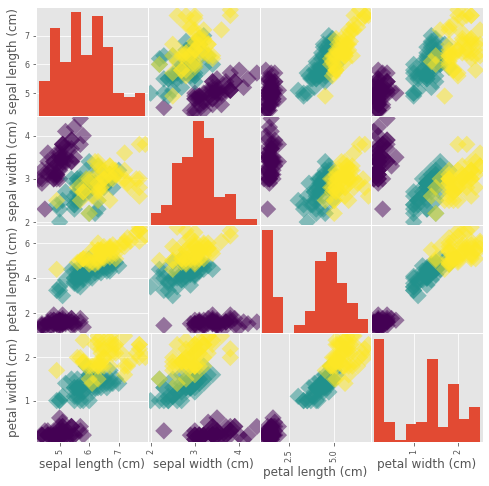

In [12]:
pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D');

## K nearest neighbors classifier

#### fit

In [13]:
iris['data'].shape , iris['target'].shape

((150, 4), (150,))

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

#### predict

In [15]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1] ,
                 [5.7, 2.6, 3.8, 1.3] ,
                 [4.7, 3.2, 1.3, 0.2]]
                )

prediction = knn.predict(X_new)

In [16]:
X_new.shape , prediction.shape

((3, 4), (3,))

In [17]:
print('prediction: {}'.format(prediction))

prediction: [1 1 0]


## train, test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

KNeighborsClassifier(n_neighbors=8)

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

## accuracy

In [19]:
knn.score(X_test, y_test)

0.9555555555555556

In [20]:
knn.score(X_train, y_train)

0.9809523809523809

# EXAMPLE: digits data
## load data and investigate

In [21]:
digits = datasets.load_digits()

In [25]:
digits.data.shape , digits.target.shape , digits.images.shape
digits.target_names
print(digits.feature_names)
digits.keys()

((1797, 64), (1797,), (1797, 8, 8))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

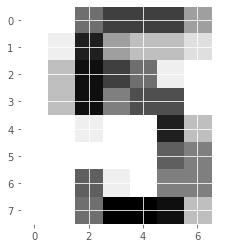

In [27]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest');
plt.show();

## create feature and target arrays

In [28]:
X = digits.data
y = digits.target

## do train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## KNN classification model

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=7)

0.9833333333333333

## overfitting and underfitting

In [32]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

type(neighbors) , len(neighbors)

(numpy.ndarray, 8)

In [33]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

In [35]:
# print results
print(train_accuracy)
print(test_accuracy)

[1.         0.99164927 0.99373695 0.99373695 0.99164927 0.98956159
 0.99025748 0.98956159]
[0.98611111 0.98611111 0.98611111 0.98333333 0.98333333 0.98055556
 0.98333333 0.97777778]


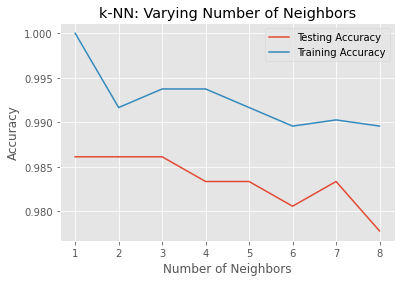

In [36]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors');
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy');
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy');
plt.legend();
plt.xlabel('Number of Neighbors');
plt.ylabel('Accuracy');
plt.show();